# DB2 IDAX - Demo - Titanic Dataset

In [1]:
from sql_preprocessing import *

### DB2 connection

In [2]:
dbconn = SqlConnection("db2+ibm_db://<user>:<password>@<host>:<port>/<db>", print_sql=True)

#### SqlDataFrame using TITANIC table in schema DATA

In [3]:
sdf_name = 'titanic1'
dataset_schema = 'DATA'
dataset_table = 'TITANIC'
key_column = 'PASSENGERID'

sdf = dbconn.get_sdf_for_table(sdf_name, dataset_schema, dataset_table, key_column)

#### TITANIC table schema

In [4]:
sdf.info()


SELECT * FROM SYSIBM.SYSCOLUMNS WHERE TBNAME='TITANIC' AND TBCREATOR='DATA'


,name,tbname,tbcreator,remarks,coltype,NULLS,codepage,dbcscodepg,length,scale,...,IDENTITY,compress,avgdistinctperpage,pagevarianceratio,implicitvalue,seclabelid,collationid,pctinlined,pctencoded,avgencodedcollen
0,PASSENGERID,TITANIC,DATA,None,INTEGER,N,0,0,4,0,...,N,O,None,-1.0,None,0,None,-1,-1,-1.0
1,SURVIVED,TITANIC,DATA,None,INTEGER,Y,0,0,4,0,...,N,O,None,-1.0,None,0,None,-1,-1,-1.0
2,PCLASS,TITANIC,DATA,None,SMALLINT,Y,0,0,2,0,...,N,O,None,-1.0,None,0,None,-1,-1,-1.0
3,NAME,TITANIC,DATA,None,VARCHAR,Y,1208,1200,100,0,...,N,O,None,-1.0,None,0,b'\x00\x00\x00\x02\xff\x00\xff\xff',-1,-1,-1.0
4,SEX,TITANIC,DATA,None,VARCHAR,Y,1208,1200,10,0,...,N,O,None,-1.0,None,0,b'\x00\x00\x00\x02\xff\x00\xff\xff',-1,-1,-1.0
5,AGE,TITANIC,DATA,None,DECIMAL,Y,0,0,30,15,...,N,O,None,-1.0,None,0,None,-1,-1,-1.0
6,SIBSP,TITANIC,DATA,None,SMALLINT,Y,0,0,2,0,...,N,O,None,-1.0,None,0,None,-1,-1,-1.0
7,PARCH,TITANIC,DATA,None,SMALLINT,Y,0,0,2,0,...,N,O,None,-1.0,None,0,None,-1,-1,-1.0
8,TICKET,TITANIC,DATA,None,VARCHAR,Y,1208,1200,100,0,...,N,O,None,-1.0,None,0,b'\x00\x00\x00\x02\xff\x00\xff\xff',-1,-1,-1.0
9,FARE,TITANIC,DATA,None,DECIMAL,Y,0,0,30,15,...,N,O,None,-1.0,None,0,None,-1,-1,-1.0


#### Data preview

In [5]:
sdf.head()


SELECT
data_table.*
FROM DATA.TITANIC AS data_table
FETCH FIRST 5 ROWS ONLY


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S


### Visualizations

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
%config InlineBackend.figure_format = 'retina'

#### Get samples for visualization - first 1000 rows from underlying table

In [7]:
df = sdf.get_table_head(limit=1000)


SELECT
data_table.*
FROM DATA.TITANIC AS data_table
FETCH FIRST 1000 ROWS ONLY


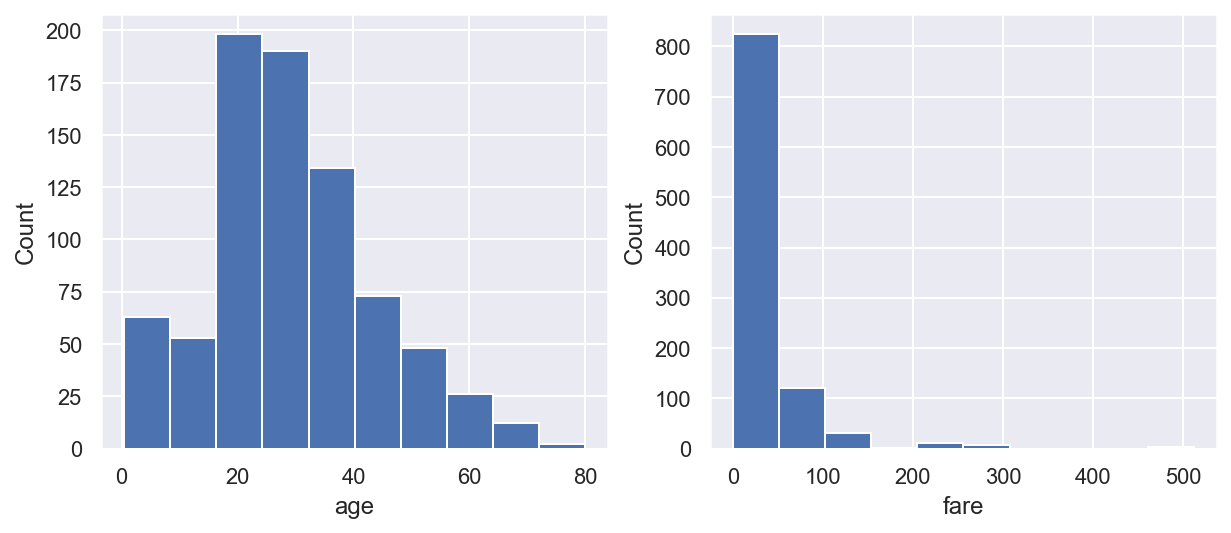

In [8]:
# Histograms for Numerical Features
_,ax = plt.subplots(1,2, figsize=(10,4))

df['age'].hist(ax=ax[0])
ax[0].set(xlabel='age')
ax[0].set(ylabel='Count')

df['fare'].hist(ax=ax[1])
ax[1].set(xlabel='fare')
ax[1].set(ylabel='Count');

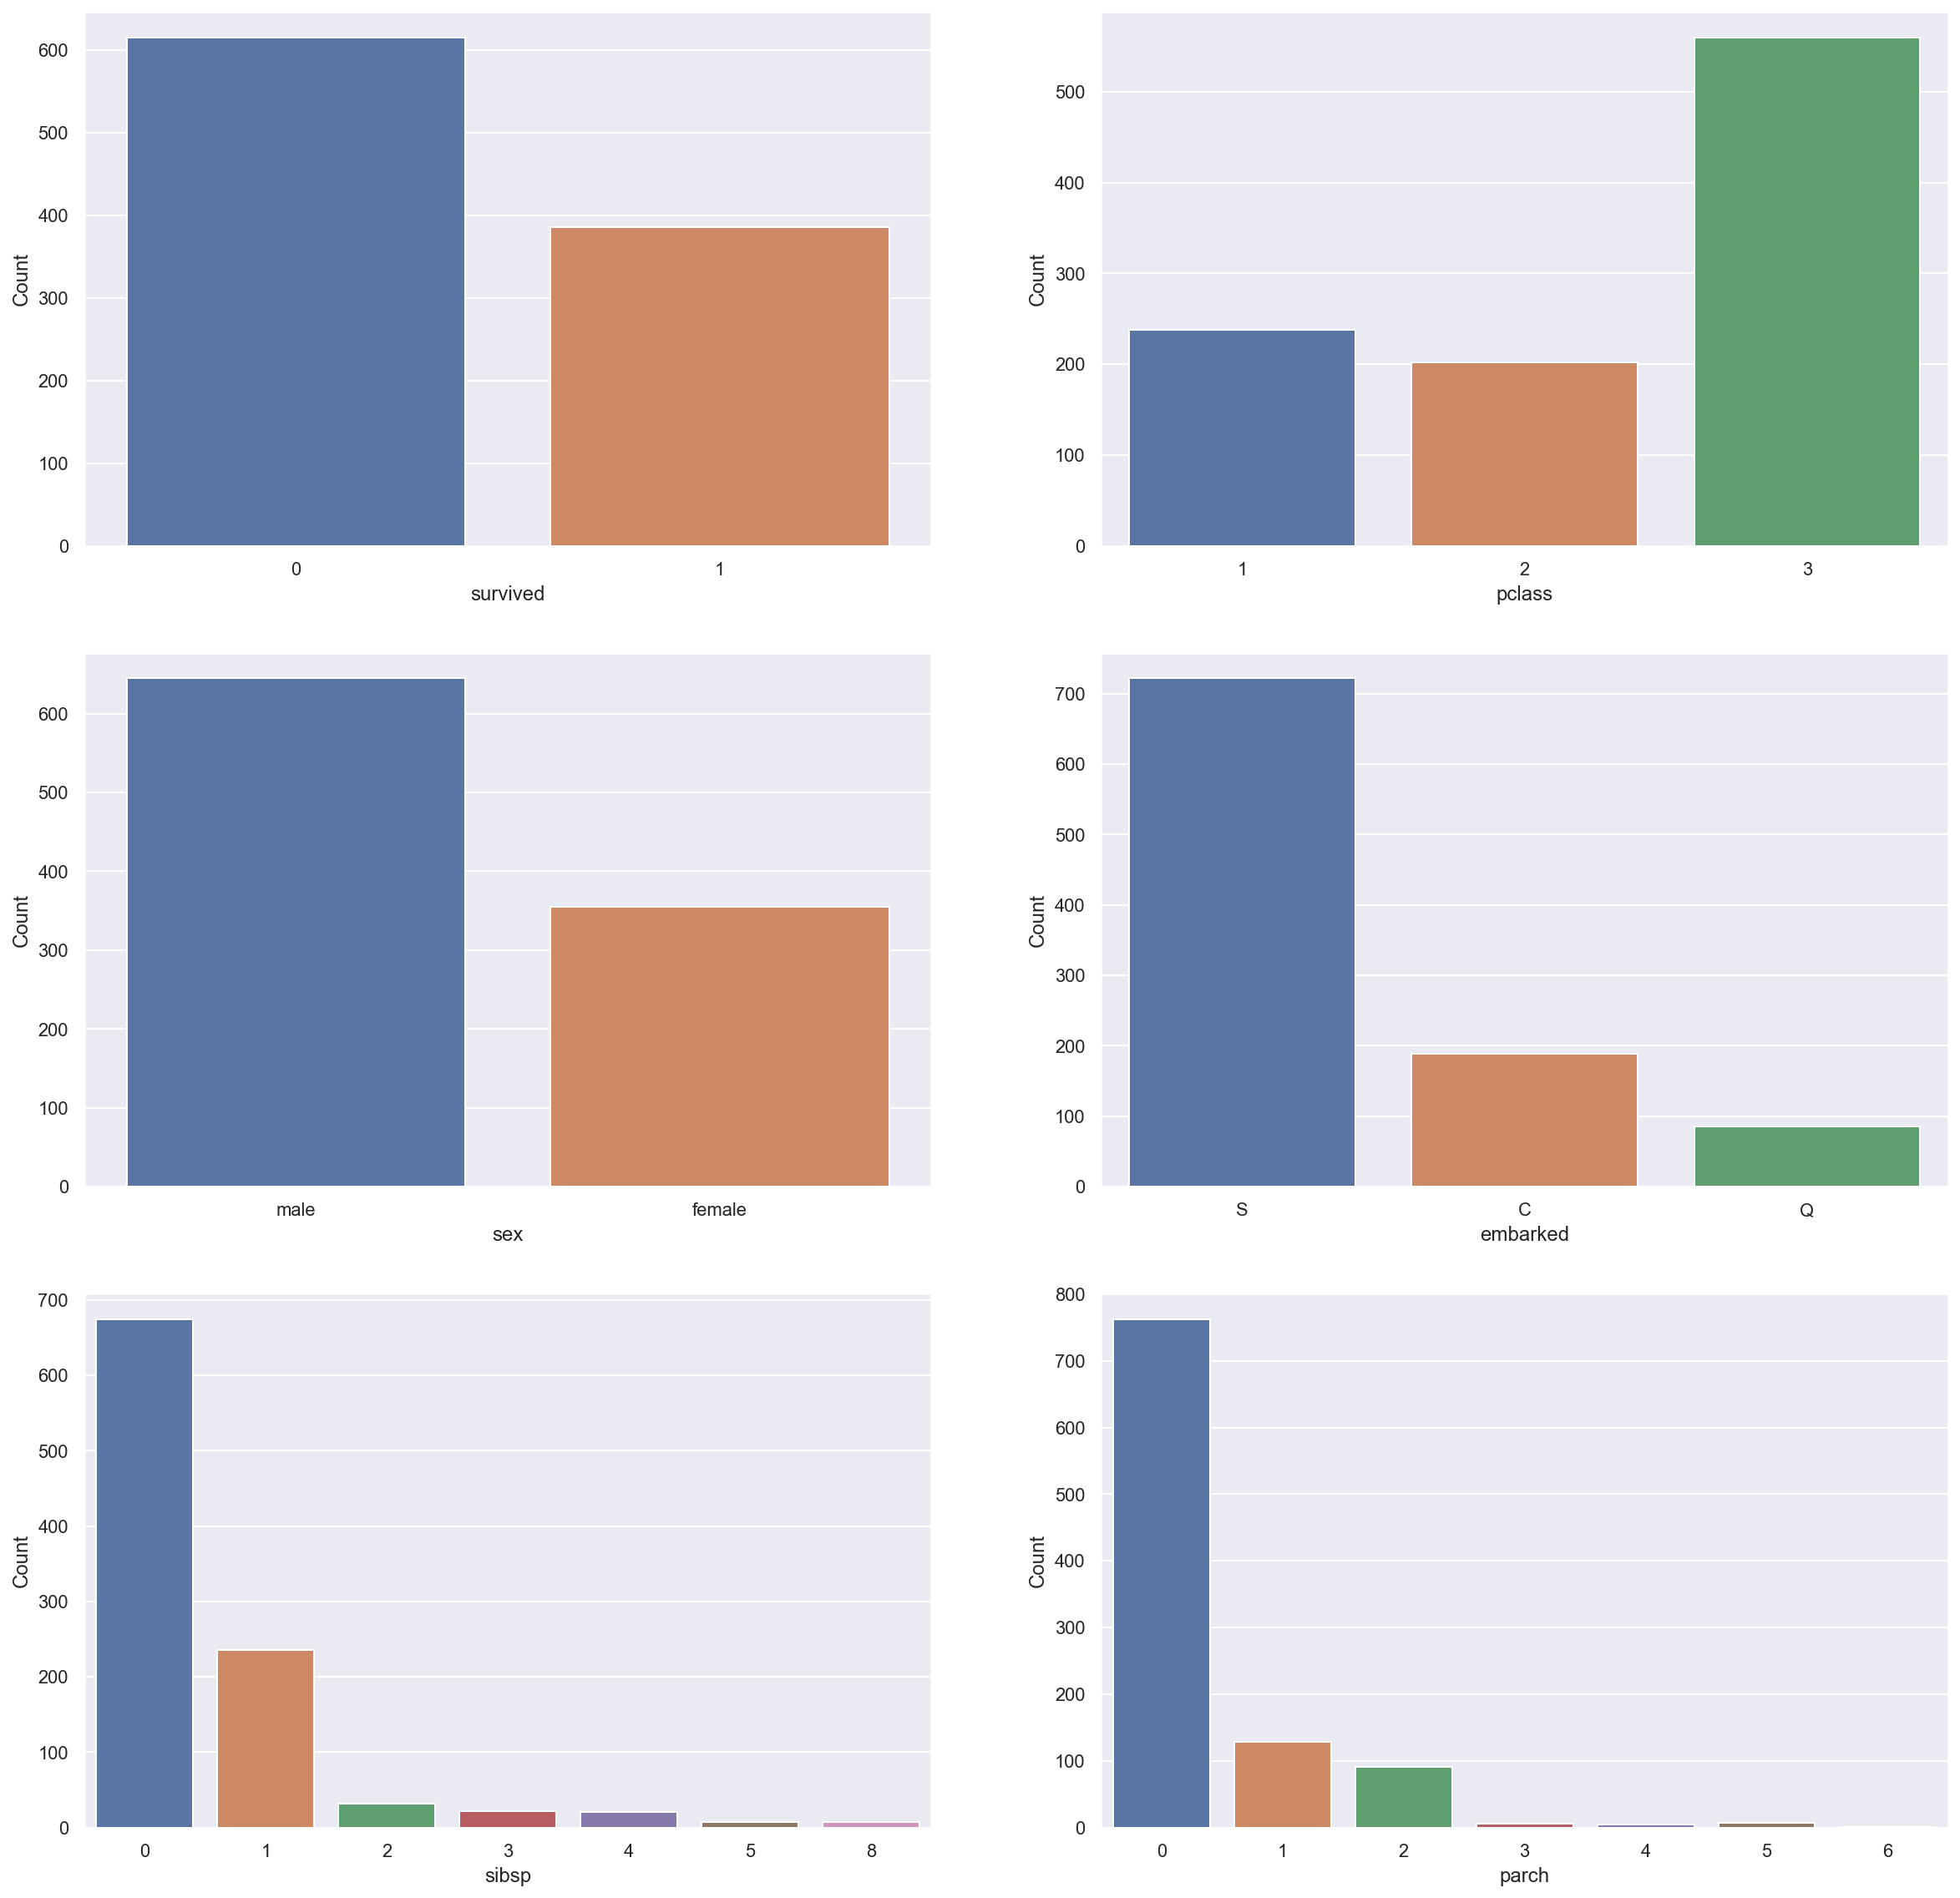

In [9]:
# Count plot for categorical features
_,ax = plt.subplots(3,2, figsize=(20,20))
                    
sns.countplot(x='survived', data=df, ax=ax[0,0])
ax[0,0].set(xlabel='survived')
ax[0,0].set(ylabel='Count')
                    
sns.countplot(x='pclass', data=df, ax=ax[0,1])
ax[0,1].set(xlabel='pclass')
ax[0,1].set(ylabel='Count')
                    
sns.countplot(x='sex', data=df, ax=ax[1,0])
ax[1,0].set(xlabel='sex')
ax[1,0].set(ylabel='Count')

sns.countplot(x='embarked', data=df, ax=ax[1,1])
ax[1,1].set(xlabel='embarked')
ax[1,1].set(ylabel='Count')

sns.countplot(x='sibsp', data=df, ax=ax[2,0])
ax[2,0].set(xlabel='sibsp')
ax[2,0].set(ylabel='Count')

sns.countplot(x='parch', data=df, ax=ax[2,1])
ax[2,1].set(xlabel='parch')
ax[2,1].set(ylabel='Count');

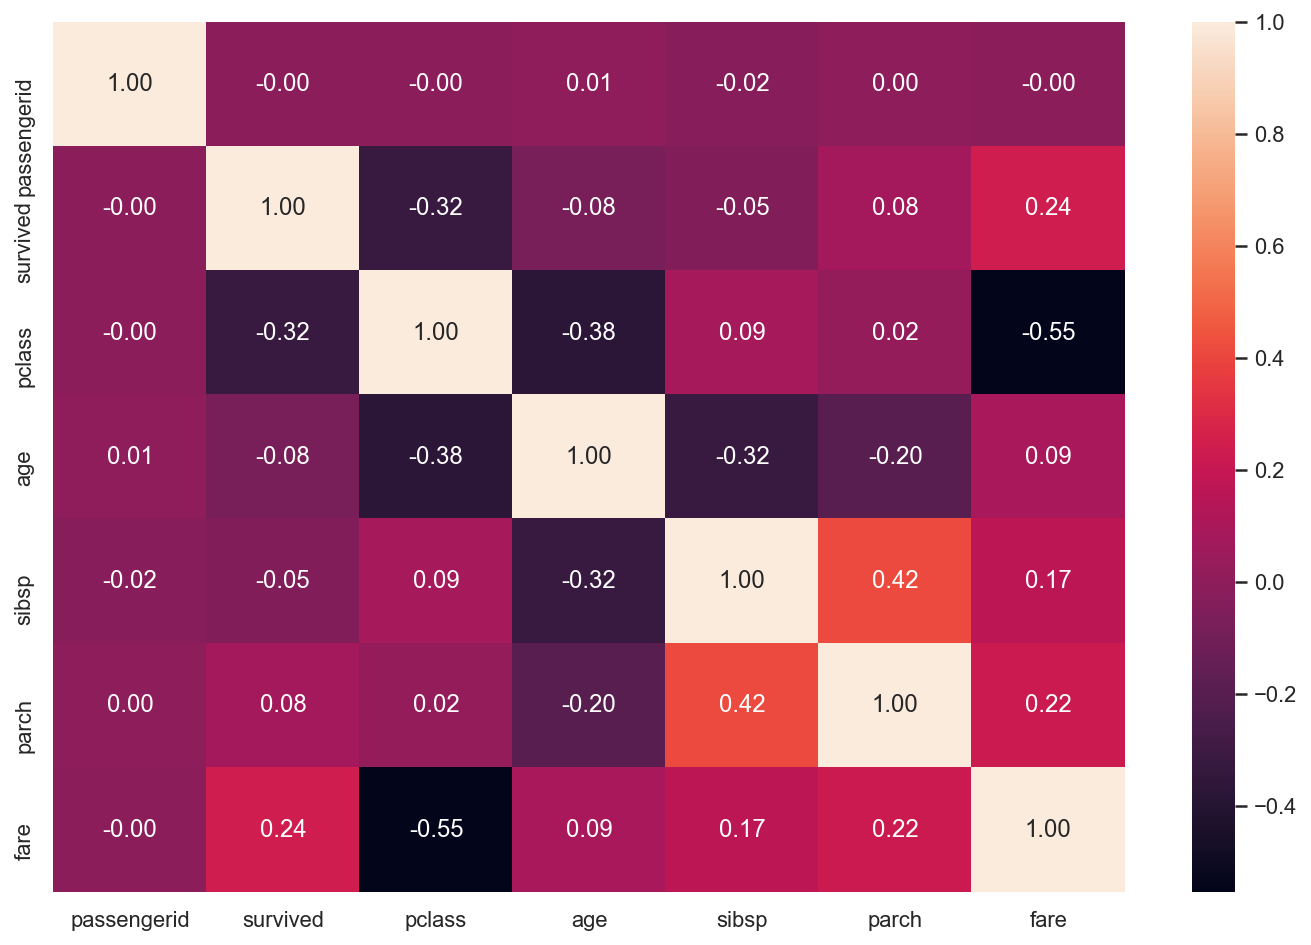

In [10]:
# Correlation Matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt = "0.2f");

### Data Transformations

#### Creating new feature extracting from existing - Title

In [11]:
sdf = sdf.clone()
cst = SqlCustomSqlTransformer("REGEXP_SUBSTR({column}, '([A-Za-z]+)\.', 1, 1)", target_column='title')
cst.fit_transform(sdf, "name")
sdf.head(return_df = True, include_source_columns = True)


SELECT
REGEXP_SUBSTR(name, '([A-Za-z]+)\.', 1, 1) AS title,
 name
FROM DATA.TITANIC AS data_table
FETCH FIRST 5 ROWS ONLY


,title,name
0,Mr.,"Braund, Mr. Owen Harris"
1,Mrs.,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,Miss.,"Heikkinen, Miss. Laina"
3,Mrs.,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,Mr.,"Allen, Mr. William Henry"


#### We can replace many titles with a more common name or classify them as Rare.
#### Than convert the categorical titles to ordinal.

In [12]:
sdf = sdf.clone()

preprocessor_l1 = SqlColumnTransformer(
    transformers=[
        ('l1_name_ct', SqlCustomSqlTransformer("REGEXP_SUBSTR({column}, '([A-Za-z]+)\.', 1, 1)", target_column='title'), 'name'),
        ('l1_name_pt', SqlPassthroughColumn(), 'name')
])


pairs = {
    ("'Mr.'", 1),
    ("'Miss.'", 2),
    ("'Mlle.'", 2),
    ("'Ms.'", 2),
    ("'Mrs.'", 3),
    ("'Mme.'", 3),
    ("'Master.'", 4)    
}

preprocessor_l2 = SqlColumnTransformer(
    transformers=[
        ('l2_name_me', SqlMapEncoder(pairs=pairs, else_value=5), 'title'),
        ('l2_name_pt', SqlPassthroughColumn(), 'title'),
        ('l2_name_pt', SqlPassthroughColumn(), 'name')
])

pipeline = SqlNestedPipeline(steps=[('preprocessor_l1', preprocessor_l1),
                                ('preprocessor_l2', preprocessor_l2),
                                ('classifier', SqlPipelineTestModel(print_df=True))])


x = pipeline.fit(sdf)



SELECT
CASE title WHEN 'Miss.' THEN 2 WHEN 'Mr.' THEN 1 WHEN 'Mlle.' THEN 2 WHEN 'Ms.' THEN 2 WHEN 'Master.' THEN 4 WHEN 'Mme.' THEN 3 WHEN 'Mrs.' THEN 3 ELSE 5 END AS title,
title AS title,
name AS name
FROM (SELECT
REGEXP_SUBSTR(name, '([A-Za-z]+)\.', 1, 1) AS title,
name AS name
FROM DATA.TITANIC AS data_table) AS data_table
SqlPipelineTestModel - fit:
    title  title                                               name
0       1    Mr.                            Braund, Mr. Owen Harris
1       3   Mrs.  Cumings, Mrs. John Bradley (Florence Briggs Th...
2       2  Miss.                             Heikkinen, Miss. Laina
3       3   Mrs.       Futrelle, Mrs. Jacques Heath (Lily May Peel)
4       1    Mr.                           Allen, Mr. William Henry
..    ...    ...                                                ...
995     1    Mr.                     Gustafsson, Mr. Anders Vilhelm
996     1    Mr.                              Mionoff, Mr. Stoytcho
997     2  Miss.             

#### converting Sex feature to a new feature called Gender where female=1 and male=0.

In [13]:
pairs = {
    ("'female'", 1),
    ("'male'", 0)
}

sdf = sdf.clone()
me = SqlMapEncoder(pairs=pairs, else_value=None, target_column='sex')
me.fit_transform(sdf, "sex")
sdf.head(return_df = True, include_source_columns = True)


SELECT
CASE sex WHEN 'female' THEN 1 WHEN 'male' THEN 0 END AS sex,
 sex
FROM DATA.TITANIC AS data_table
FETCH FIRST 5 ROWS ONLY


,sex,sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male


#### Let us replace Age with ordinals based on these bands.

In [14]:
sdf = sdf.clone()

cases={
    ('{column} <= 16', 0), 
    ('{column} > 16 and {column} <= 32', 1),
    ('{column} > 32 and {column} <= 48', 2),
    ('{column} > 48 and {column} <= 64', 3),
    ('{column} > 64', 4)
}

ce = SqlCaseEncoder(cases=cases, target_column='age')
ce.fit_transform(sdf, "age")
sdf.head(return_df = True, limit=10, include_source_columns = True)


SELECT
CASE WHEN age > 48 and age <= 64 THEN 3 WHEN age <= 16 THEN 0 WHEN age > 16 and age <= 32 THEN 1 WHEN age > 32 and age <= 48 THEN 2 WHEN age > 64 THEN 4 END AS age,
 age
FROM DATA.TITANIC AS data_table
FETCH FIRST 10 ROWS ONLY


,age,age
0,1.0,22.0
1,2.0,38.0
2,1.0,26.0
3,2.0,35.0
4,2.0,35.0
5,NaN,NaN
6,3.0,54.0
7,0.0,2.0
8,1.0,27.0
9,0.0,14.0


#### We can create a new feature for FamilySize which combines Parch and SibSp

In [15]:
sdf = sdf.clone()

mapper = SqlDataFrameMapper([
    ('SibSp', SqlCustomSqlTransformer("SibSp + Parch + 1", target_column='FamilySize')),
    ('SibSp', SqlPassthroughColumn()),
    ('Parch', SqlPassthroughColumn())
])

mapper.fit_transform(sdf)
sdf.head(return_df = True, limit=10)


SELECT
SibSp + Parch + 1 AS FamilySize,
SibSp AS SibSp,
Parch AS Parch
FROM DATA.TITANIC AS data_table
FETCH FIRST 10 ROWS ONLY


,familysize,sibsp,parch
0,2,1,0
1,2,1,0
2,1,0,0
3,2,1,0
4,1,0,0
5,1,0,0
6,1,0,0
7,5,3,1
8,3,0,2
9,2,1,0


#### We can create another feature called IsAlone.

In [16]:
sdf = sdf.clone()

preprocessor_l1 = SqlColumnTransformer(
    transformers=[
        ('l1_familysize', SqlCustomSqlTransformer("SibSp + Parch + 1", target_column='familysize'), 'SibSp')
])

preprocessor_l2 = SqlColumnTransformer(
    transformers=[
        ('l2_isalone', SqlMapEncoder(pairs={(1, 1)}, else_value=0, target_column='isalone'), 'familysize'),
        ('l1_familysize', SqlPassthroughColumn(), 'familysize')
])

pipeline = SqlNestedPipeline(steps=[('preprocessor_l1', preprocessor_l1),
                                ('preprocessor_l2', preprocessor_l2),
                                ('classifier', SqlPipelineTestModel(print_df=True))])


x = pipeline.fit(sdf)


SELECT
CASE familysize WHEN 1 THEN 1 ELSE 0 END AS isalone,
familysize AS familysize
FROM (SELECT
SibSp + Parch + 1 AS familysize
FROM DATA.TITANIC AS data_table) AS data_table
SqlPipelineTestModel - fit:
     isalone  familysize
0          0           2
1          0           2
2          1           1
3          0           2
4          1           1
..       ...         ...
995        0           3
996        1           1
997        1           1
998        1           1
999        1           1

[1000 rows x 2 columns]


#### We can also create an artificial feature combining Pclass and Age.

In [17]:
sdf = sdf.clone()


cases={
    ('{column} <= 16', 0), 
    ('{column} > 16 and {column} <= 32', 1),
    ('{column} > 32 and {column} <= 48', 2),
    ('{column} > 48 and {column} <= 64', 3),
    ('{column} > 64', 4)
}

preprocessor_l1 = SqlColumnTransformer(
    transformers=[
        ('age', SqlCaseEncoder(cases=cases, target_column='age'), 'age'),
        ('pclass', SqlPassthroughColumn(), 'pclass')
])

preprocessor_l2 = SqlColumnTransformer(
    transformers=[
        ('age_pclass', SqlCustomSqlTransformer("age * pclass", target_column='age_pclass'), 'age'),
        ('age', SqlPassthroughColumn(), 'age'),
        ('pclass', SqlPassthroughColumn(), 'pclass')
])

pipeline = SqlNestedPipeline(steps=[('preprocessor_l1', preprocessor_l1),
                                ('preprocessor_l2', preprocessor_l2),
                                ('classifier', SqlPipelineTestModel(print_df=True))])


x = pipeline.fit(sdf)


SELECT
age * pclass AS age_pclass,
age AS age,
pclass AS pclass
FROM (SELECT
CASE WHEN age > 48 and age <= 64 THEN 3 WHEN age <= 16 THEN 0 WHEN age > 16 and age <= 32 THEN 1 WHEN age > 32 and age <= 48 THEN 2 WHEN age > 64 THEN 4 END AS age,
pclass AS pclass
FROM DATA.TITANIC AS data_table) AS data_table
SqlPipelineTestModel - fit:
     age_pclass  age  pclass
0           3.0  1.0       3
1           2.0  2.0       1
2           3.0  1.0       3
3           2.0  2.0       1
4           6.0  2.0       3
..          ...  ...     ...
995         6.0  2.0       3
996         3.0  1.0       3
997         3.0  1.0       3
998         NaN  NaN       3
999         6.0  2.0       3

[1000 rows x 3 columns]


#### Converting categorical feature to numeric
#### We can now convert the EmbarkedFill feature by creating a new numeric Port feature.

In [18]:
pairs = {
    ("'S'", 0),
    ("'C'", 1),
    ("'Q'", 2),
}

sdf = sdf.clone()
me = SqlMapEncoder(pairs=pairs, else_value=None, target_column='Embarked')
me.fit_transform(sdf, "Embarked")
sdf.head(return_df = True, include_source_columns = True)


SELECT
CASE Embarked WHEN 'C' THEN 1 WHEN 'Q' THEN 2 WHEN 'S' THEN 0 END AS Embarked,
 Embarked
FROM DATA.TITANIC AS data_table
FETCH FIRST 5 ROWS ONLY


,embarked,embarked
0,0,S
1,1,C
2,0,S
3,0,S
4,0,S


#### Convert the Fare feature to ordinal values

In [19]:

sdf = sdf.clone()

cases={
    ('{column} <= 7.91', 0), 
    ('{column} > 7.91 and {column} <= 14.454', 1),
    ('{column} > 14.454 and {column} <= 31', 2),
    ('{column} > 31', 3)
}

ce = SqlCaseEncoder(cases=cases, target_column='fare')
ce.fit_transform(sdf, "fare")
sdf.head(return_df = True, limit=10, include_source_columns = True)



SELECT
CASE WHEN fare > 14.454 and fare <= 31 THEN 2 WHEN fare > 7.91 and fare <= 14.454 THEN 1 WHEN fare <= 7.91 THEN 0 WHEN fare > 31 THEN 3 END AS fare,
 fare
FROM DATA.TITANIC AS data_table
FETCH FIRST 10 ROWS ONLY


,fare,fare
0,0,7.2500
1,3,71.2833
2,1,7.9250
3,3,53.1000
4,1,8.0500
5,1,8.4583
6,3,51.8625
7,2,21.0750
8,1,11.1333
9,2,30.0708


## Training - IDAX Pipeline with combined transformation and IDAX model

In [20]:
sdf = sdf.clone()

pairs_sex = {
    ("'female'", 1),
    ("'male'", 0)
}

pairs_title = {
    ("'Mr.'", 1),
    ("'Miss.'", 2),
    ("'Mlle.'", 2),
    ("'Ms.'", 2),
    ("'Mrs.'", 3),
    ("'Mme.'", 3),
    ("'Master.'", 4)    
}

cases_age={
    ('{column} <= 16', 0), 
    ('{column} > 16 and {column} <= 32', 1),
    ('{column} > 32 and {column} <= 48', 2),
    ('{column} > 48 and {column} <= 64', 3),
    ('{column} > 64', 4)
}

pairs_embarked = {
    ("'S'", 0),
    ("'C'", 1),
    ("'Q'", 2),
}

cases_fare={
    ('{column} <= 7.91', 0), 
    ('{column} > 7.91 and {column} <= 14.454', 1),
    ('{column} > 14.454 and {column} <= 31', 2),
    ('{column} > 31', 3)
}

preprocessor_l1 = SqlColumnTransformer(
    transformers=[
        ('l1_passengerid', SqlPassthroughColumn(), 'passengerid'),
        ('l1_survived', SqlPassthroughColumn(), 'survived'),
        ('l1_pclass', SqlPassthroughColumn(), 'pclass'),
        ('l1_sex', SqlMapEncoder(pairs=pairs_sex, else_value=None, target_column='sex'), 'sex'),
        ('l1_age', SqlCaseEncoder(cases=cases_age, target_column='age'), 'age'),
        ('l1_fare', SqlCaseEncoder(cases=cases, target_column='fare'), 'fare'),
        ('l1_embarked', SqlMapEncoder(pairs=pairs, else_value=None, target_column='Embarked'), 'embarked'),
        ('l1_title', SqlCustomSqlTransformer("REGEXP_SUBSTR({column}, '([A-Za-z]+)\.', 1, 1)", target_column='title'), 'name'),
        ('l1_familysize', SqlCustomSqlTransformer("SibSp + Parch + 1", target_column='FamilySize'), 'sibsp'),
])


preprocessor_l2 = SqlColumnTransformer(
    transformers=[
        ('l1_passengerid', SqlPassthroughColumn(), 'passengerid'),
        ('l2_survived', SqlPassthroughColumn(), 'survived'),
        ('l2_pclass', SqlPassthroughColumn(), 'pclass'),
        ('l2_sex', SqlPassthroughColumn(), 'sex'),
        ('l2_age', SqlPassthroughColumn(), 'age'),
        ('l2_fare', SqlPassthroughColumn(), 'fare'),
        ('l2_embarked', SqlPassthroughColumn(), 'embarked'),
        ('l2_title', SqlMapEncoder(pairs=pairs_title, else_value=5, target_column='title'), 'title'),
        ('l2_isalone', SqlMapEncoder(pairs={(1, 1)}, else_value=0, target_column='isalone'), 'familysize'),
        ('l2_age_pclass', SqlCustomSqlTransformer("age * pclass", target_column='age_pclass'), 'age'),
])

model=IDAXDecTree(sdf=sdf, column_target='SURVIVED', column_in='SURVIVED:nom;PCLASS:nom')

pipeline = IDAXNestedPipeline(steps=[('preprocessor_l1', preprocessor_l1),
                                ('preprocessor_l2', preprocessor_l2)],
                                model=model)

pipeline.fit(sdf)


SELECT * FROM SYSIBM.SYSTABLES WHERE UPPER(NAME)=UPPER('titanic1_fitted') AND UPPER(CREATOR)=UPPER('DATA')

CREATE TABLE DATA.titanic1_fitted AS
(SELECT
passengerid AS passengerid,
survived AS survived,
pclass AS pclass,
sex AS sex,
age AS age,
fare AS fare,
embarked AS embarked,
CASE title WHEN 'Miss.' THEN 2 WHEN 'Mr.' THEN 1 WHEN 'Mlle.' THEN 2 WHEN 'Ms.' THEN 2 WHEN 'Master.' THEN 4 WHEN 'Mme.' THEN 3 WHEN 'Mrs.' THEN 3 ELSE 5 END AS title,
CASE familysize WHEN 1 THEN 1 ELSE 0 END AS isalone,
age * pclass AS age_pclass
FROM (SELECT
passengerid AS passengerid,
survived AS survived,
pclass AS pclass,
CASE sex WHEN 'female' THEN 1 WHEN 'male' THEN 0 END AS sex,
CASE WHEN age > 48 and age <= 64 THEN 3 WHEN age <= 16 THEN 0 WHEN age > 16 and age <= 32 THEN 1 WHEN age > 32 and age <= 48 THEN 2 WHEN age > 64 THEN 4 END AS age,
CASE WHEN fare > 14.454 and fare <= 31 THEN 2 WHEN fare > 7.91 and fare <= 14.454 THEN 1 WHEN fare <= 7.91 THEN 0 WHEN fare > 31 THEN 3 END AS fare,
CASE embarked 

### Evaluate Model

In [21]:
pipeline.predict(sdf, execute_transform=False)


SELECT * FROM SYSIBM.SYSTABLES WHERE UPPER(NAME)=UPPER('titanic1_predictions') AND UPPER(CREATOR)=UPPER('DATA')

CALL IDAX.PREDICT_DECTREE('model=DATA.titanic1, intable=DATA.titanic1_fitted, outtable=DATA.titanic1_predictions')

SELECT * FROM SYSIBM.SYSTABLES WHERE UPPER(NAME)=UPPER('SQLDP_TABLE_CATALOG') AND UPPER(CREATOR)=UPPER('DATA')

DELETE FROM DATA.SQLDP_TABLE_CATALOG WHERE sdf_name = 'titanic1' and dataset_schema = 'DATA' and dataset_table = 'TITANIC' and table_schema = 'DATA' and table_name = 'titanic1_predictions'

INSERT INTO DATA.SQLDP_TABLE_CATALOG VALUES ('titanic1', 'DATA', 'TITANIC', 'DATA', 'titanic1_predictions', current_timestamp)


In [22]:
# Function for plotting confusion matrix
def plot_conf_mtx(model, sdf):

    arr = model.get_confusion_matrix(sdf).to_numpy()
    conf_matrix=np.vstack( (np.hstack((arr[0],arr[1])),np.hstack((arr[2],arr[3]) ) ))
    
    group_names = ['True Negatives','False Positives','False Negatives','True Positives']
    group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')
    plt.xlabel('Predicted Value')
    plt.ylabel('Actual Value')


SELECT * FROM SYSIBM.SYSTABLES WHERE UPPER(NAME)=UPPER('titanic1_cm') AND UPPER(CREATOR)=UPPER('DATA')

CALL IDAX.CONFUSION_MATRIX('intable=DATA.titanic1_fitted, id=PASSENGERID, target=SURVIVED, resulttable=DATA.titanic1_predictions, matrixtable=DATA.titanic1_cm')

Unpruned model on Training Set:

SELECT CNT FROM DATA.titanic1_cm


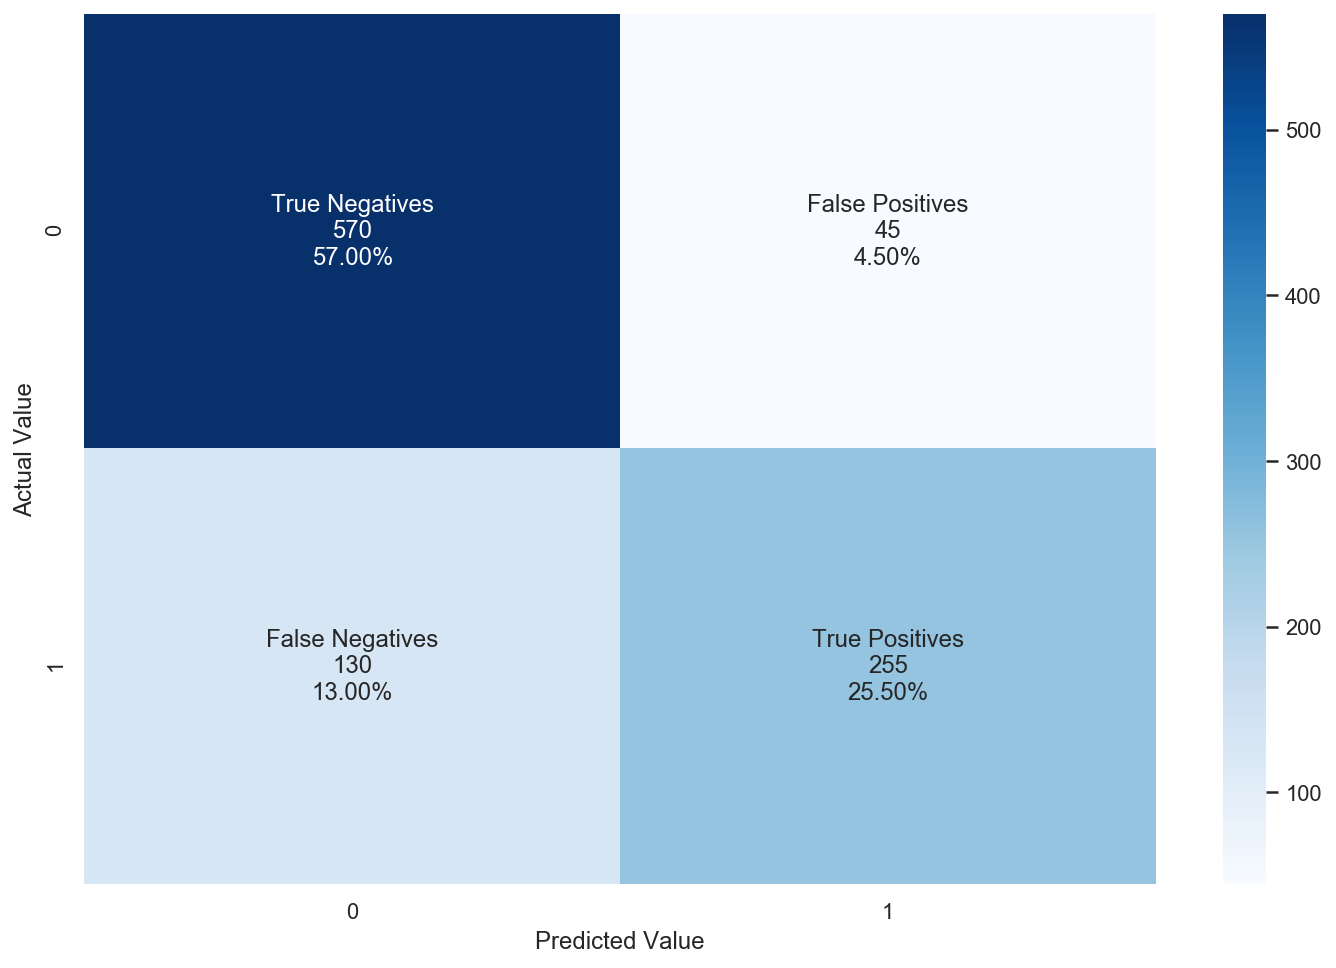

In [23]:
model.build_confusion_matrix(sdf)

# Print confusion matrix
print('\nUnpruned model on Training Set:')
plot_conf_mtx(model, sdf)
plt.show()

#### Drop all temporary objects from database

In [24]:
sdf.dbcatalog.drop_temporary_tables()
model.drop_model(sdf)


SELECT table_schema, table_name FROM DATA.SQLDP_TABLE_CATALOG WHERE sdf_name = 'titanic1' and dataset_schema = 'DATA' and sdf_name = 'titanic1'

SELECT * FROM SYSIBM.SYSTABLES WHERE UPPER(NAME)=UPPER('titanic1_fitted') AND UPPER(CREATOR)=UPPER('DATA')

DROP TABLE DATA.titanic1_fitted

DELETE FROM DATA.SQLDP_TABLE_CATALOG WHERE sdf_name = 'titanic1' and dataset_schema = 'DATA' and dataset_table = 'TITANIC' and table_schema = 'DATA' and table_name = 'titanic1_fitted'

SELECT * FROM SYSIBM.SYSTABLES WHERE UPPER(NAME)=UPPER('titanic1_predictions') AND UPPER(CREATOR)=UPPER('DATA')

DROP TABLE DATA.titanic1_predictions

DELETE FROM DATA.SQLDP_TABLE_CATALOG WHERE sdf_name = 'titanic1' and dataset_schema = 'DATA' and dataset_table = 'TITANIC' and table_schema = 'DATA' and table_name = 'titanic1_predictions'

CALL IDAX.DROP_MODEL('model=DATA.titanic1')
